# **Project Name**    -  Hotel Booking Analysis



##### **Project Type**    - EDA


# **Project Summary -**

The Project is on Hotel booking data set , which contains the data of two types of Hotels i.e City & Resort, over a period of a year. The dataset has the data of number of bookings in each type of hotel , medium of bookings , meals preferred by the customers, types of customers etc. 
The project is to analyse the data from different dimensions and give the business insights. 
 
To get started with the observations and giving business insights, the dataset should have the apt data to be analyzed. 
To make data apt for analysis the data is cleaned, involving procedures like dealing with the null values, dropping the duplicate values , manipulating the data as per the requirement. 
After the data is cleaned it is visualised in different dimensions, various charts and graphs are used to put forward the story which the data is trying to tell. For visualisations different python libraries are used. For ex- Seaborn, Matplotlib, plotly etc. 



# **Problem Statement**


**Write Problem Statement Here.**
 
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in
order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a
disproportionately high number of special requests? This hotel booking dataset can help you explore those
questions! This data set contains booking information for a city hotel and a resort hotel, and includes
information such as when the booking was made, length of stay, the number of adults, children, and/or babies,
and the number of available parking spaces, among other things. All personally identifying information has been
removed from the data. Explore and analyse the data to discover important factors that govern the bookings.

#### **Define Your Business Objective?**

Analyse the data on bookings of City Hotel and Resort Hotel to gain insights on the different factors that affect the booking.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

'Colab Notebooks'  'EDA datasets'


In [ ]:
df = pd.read_csv('/content/drive/My Drive/EDA datasets/Hotel Bookings.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
count_row = df.shape[0]
count_column = df.shape[1]
print('Rows', count_row)
print('Columns', count_column)

Rows 119390
Columns 32


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_val  = df.isna().sum()
print(missing_val)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Visualizing the missing values
missing_values = df.isna().sum().value_counts()
print(missing_values)

0         28
4          1
488        1
16340      1
112593     1
dtype: int64


In [ ]:
visual_missing = df.isna().sum().sort_values(ascending=False)
visual_missing.index[:4]
visual_missing[:4]

company     112593
agent        16340
country        488
children         4
dtype: int64

Text(0.5, 1.0, 'Null values count in each Column')

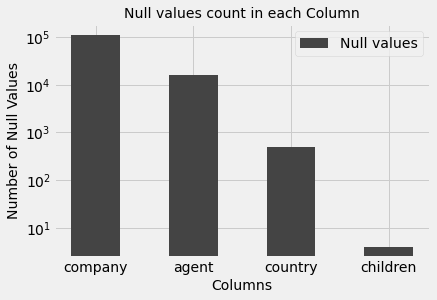

In [ ]:
plt.style.use('fivethirtyeight')
plt.bar(visual_missing.index[:4],visual_missing[:4], width = 0.5,  color='#444444', label="Null values")
plt.legend()
plt.yscale("log")
axis_font = {'fontname':'Arial', 'size':'14'}
plt.xlabel('Columns', **axis_font)
plt.ylabel('Number of Null Values', **axis_font)
plt.title('Null values count in each Column', **axis_font)

### What did you know about your dataset?

In this dataset contains total rows 119390 and 32 columns.In this we divide data manipulation workflow in three category Data Collection ,Data cleaning and manipulation and EDA(Exploratory Data Analysis). 


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
for col in df.columns:
  print(col)

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
company
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date


In [ ]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description 

**The columns and the data it represents are listed below:**

**hotel** : Name of the hotel (Resort Hotel or City Hotel)

**is_canceled** : If the booking was canceled (1) or not (0)

**lead_time**: Number of days before the actual arrival of the guests

**arrival_date_year** : Year of arrival date

**arrival_date_month** : Month of month arrival date

**arrival_date_week_number** : Week number of year for arrival date

**arrival_date_day_of_month** : Day of arrival date

**stays_in_weekend_nights **: Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

**stays_in_week_nights** : Number of weeknights (Monday to Friday) spent at the hotel by the guests.

**adults** : Number of adults among guests

**children** : Number of children among guests

**babies** : Number of babies among guests

**meal** : Type of meal booked

**country** : Country of guests

**market_segment** : Designation of market segment

**distribution_channel** : Name of booking distribution channel

**is_repeated_guest** : If the booking was from a repeated guest (1) or not (0)

**previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type** : Code of room type reserved

**assigned_room_type** : Code of room type assigned

**booking_changes** : Number of changes/amendments made to the booking

**deposit_type** : Type of the deposit made by the guest

**agent** : ID of travel agent who made the booking

**company** : ID of the company that made the booking

**days_in_waiting_list** : Number of days the booking was in the waiting list

**customer_type** : Type of customer, assuming one of four categories

**adr** : Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

**required_car_parking_spaces** : Number of car parking spaces required by the customer

**total_of_special_requests** : Number of special requests made by the customer

**reservation_status** : Reservation status (Canceled, Check-Out or No-Show)

**reservation_status_date** : Date at which the last reservation status was updated


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(df.apply(lambda col:col.unique()))

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

**DATA Cleaning**

Dealing with NULL values in the Data set

In [ ]:
#finding null values in the dataset 
df.isna().sum().sort_values(ascending = False)[:6]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
dtype: int64

In [ ]:
df = df.drop(df[df['babies']+df['adults']+df['children']==0].index)

In [ ]:
#filling null values with 0
df['agent'].fillna(0,inplace=True)
df['company'].fillna(0,inplace=True)
df['country'].fillna(0,inplace=True)
df['children'].fillna(0,inplace = True)

In [ ]:
#null values cleaned
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

**Dealing with Duplicate data in the dataset**

In [ ]:
#finding duplicate values in the datasets 
#true means there are duplicates
df.duplicated().value_counts()

False    87230
True     31980
dtype: int64

In [ ]:
#dropping duplicate values
df.drop_duplicates(keep=False, inplace=True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0.0,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03


**Checking Datatype for all columns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79069 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           79069 non-null  object 
 1   is_canceled                     79069 non-null  int64  
 2   lead_time                       79069 non-null  int64  
 3   arrival_date_year               79069 non-null  int64  
 4   arrival_date_month              79069 non-null  object 
 5   arrival_date_week_number        79069 non-null  int64  
 6   arrival_date_day_of_month       79069 non-null  int64  
 7   stays_in_weekend_nights         79069 non-null  int64  
 8   stays_in_week_nights            79069 non-null  int64  
 9   adults                          79069 non-null  int64  
 10  children                        79069 non-null  float64
 11  babies                          79069 non-null  int64  
 12  meal                           

In [ ]:
#children and agent columns have integer values but their data type mentioned is float.
for i in list(df.columns):
  if df[i].dtypes == 'float64':
    df[i] = df[i].apply(int)

df.dtypes

hotel                             object
is_canceled                        int64
lead_time                          int64
arrival_date_year                  int64
arrival_date_month                object
arrival_date_week_number           int64
arrival_date_day_of_month          int64
stays_in_weekend_nights            int64
stays_in_week_nights               int64
adults                             int64
children                           int64
babies                             int64
meal                              object
country                           object
market_segment                    object
distribution_channel              object
is_repeated_guest                  int64
previous_cancellations             int64
previous_bookings_not_canceled     int64
reserved_room_type                object
assigned_room_type                object
booking_changes                    int64
deposit_type                      object
agent                              int64
company         

In [ ]:
#checking children and agent data type #should be int64
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79069 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           79069 non-null  object
 1   is_canceled                     79069 non-null  int64 
 2   lead_time                       79069 non-null  int64 
 3   arrival_date_year               79069 non-null  int64 
 4   arrival_date_month              79069 non-null  object
 5   arrival_date_week_number        79069 non-null  int64 
 6   arrival_date_day_of_month       79069 non-null  int64 
 7   stays_in_weekend_nights         79069 non-null  int64 
 8   stays_in_week_nights            79069 non-null  int64 
 9   adults                          79069 non-null  int64 
 10  children                        79069 non-null  int64 
 11  babies                          79069 non-null  int64 
 12  meal                            79069 non-nul

**Adding/Removing/Merging columns as per requirements**

In [ ]:
#taking stay at nights week wise
df['total_night_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_night_stays']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_night_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,Transient,0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Transient,0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75,0,0,Check-Out,2015-07-02,1
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107,0,0,Check-Out,2015-07-03,2


In [ ]:
#taking total head count
df['total_heads'] = df['adults'] + df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_night_stays,total_heads
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75,0,0,Check-Out,2015-07-02,1,1
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,Transient,107,0,0,Check-Out,2015-07-03,2,2


### What all manipulations have you done and insights you found?

The Manipulations done in the data set are :
1. Uniforming the null values with an integer
2. Dropping the duplicate values to avoid data redundancy
3. Merging 3 fields into one.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code    
def get_count_for_bar_columns(df, column_label):
  group_df = df[column_label].value_counts()
  group_df = pd.DataFrame({'index':group_df.index, 'count':group_df.values})
  return group_df


def plot_bar_chart_from_column(df, column_label, t1):
  df_grouped = get_count_for_bar_columns(df, column_label)
  fig, ax = plt.subplots(figsize=(14, 6))
  c= ['g','r','b','c','y']
  ax.bar(df_grouped['index'], df_grouped['count'], width = 0.4, align = 'edge', edgecolor = 'black', linewidth = 4, color = c, linestyle = ':', alpha = 0.5)
  plt.title(t1, bbox={'facecolor':'0.8', 'pad':3})
  plt.legend()
  plt.ylabel('Count')
  plt.xticks(rotation = 15) # use to format the lable of x-axis
  plt.xlabel(column_label)
  plt.show()

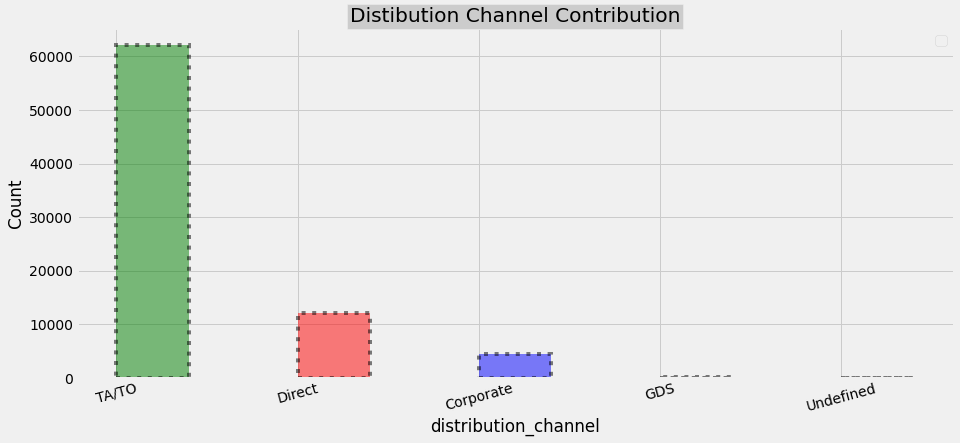

In [ ]:
plot_bar_chart_from_column(df, 'distribution_channel', 'Distibution Channel Contribution')

##### 1. Why did you pick the specific chart?

**The following chart represent maximum volume of booking done through which channel to represnt the numbers in descending order we chose bar graph**

##### 2. What is/are the insight(s) found from the chart?

**As clearly seen TA/TO(Tour of Agent & Tour of operator) is highest, recommending to continue booking through TA/TO**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes this shows positive business impact.**

**Higher the number of TA/TO will help to increase the revenue generation of Hotel.**

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
guest_month_wise = pd.DataFrame(df[['arrival_date_month', 'total_heads']])
guest_month_wise_df = guest_month_wise.groupby(['arrival_date_month'])['total_heads'].sum()
guest_month_wise_df.sort_values(ascending = False, inplace = True)
     

df['total_heads']

0         2
1         2
2         1
3         1
6         2
         ..
119385    2
119386    3
119387    2
119388    2
119389    2
Name: total_heads, Length: 79069, dtype: int64

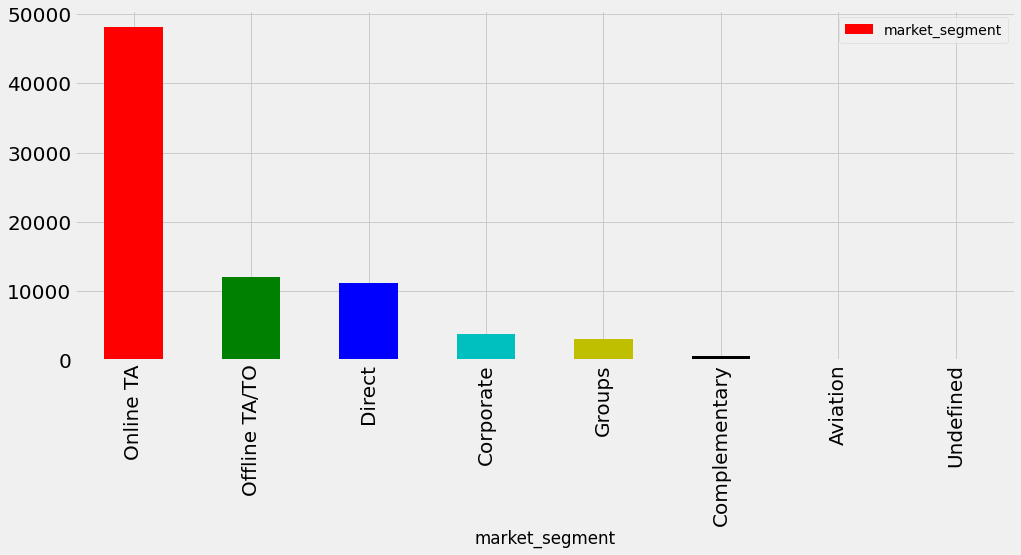

In [ ]:
market_segment_df = pd.DataFrame(df['market_segment'])
market_segment_df_data = market_segment_df.groupby('market_segment')['market_segment'].count()
market_segment_df_data.sort_values(ascending = False, inplace = True)
plt.figure(figsize=(15,6))
y = np.array([4,5,6])
market_segment_df_data.plot(kind = 'bar', color=['r', 'g', 'b', 'c', 'y', 'black', 'brown'], fontsize = 20,legend='True')

##### 1. Why did you pick the specific chart?

**In this chart, we have seen market segment by which hotel has booked**

##### 2. What is/are the insight(s) found from the chart?

**Online TA has been used most frequently to book hotel by the guest.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, it is creating positive business impact that guests are using Online TA market segment as most prefered to book hotels.**

#### Chart - 3

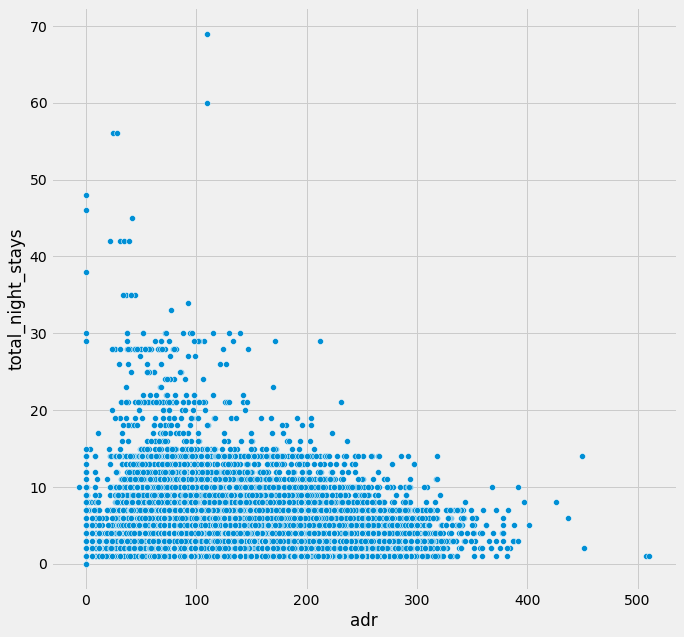

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize = (10,10))
sns.scatterplot(y = 'total_night_stays', x = 'adr', data = df[df['adr'] < 1000])
plt.show()

##### 1. Why did you pick the specific chart?

**To show comparision & affect of total stay days vs ADR**

##### 2. What is/are the insight(s) found from the chart?

**Here, we found that if guest's stay days is getting decreased, ADR is getting high**

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
def get_count_from_column(df, column_label):
  df_grpd = df[column_label].value_counts()
  df_grpd = pd.DataFrame({'index':df_grpd.index, 'count':df_grpd.values})
  return df_grpd

# plot a pie chart from grouped data
def plot_pie_chart_from_column(df, column_label, t1, exp):
  df_grpd = get_count_from_column(df, column_label)
  fig, ax = plt.subplots(figsize=(14,9))
  ax.pie(df_grpd.loc[:, 'count'], labels=df_grpd.loc[:, 'index'], autopct='%1.2f%%',startangle=90,shadow=True, labeldistance = 1, explode = exp)
  plt.title(t1, bbox={'facecolor':'0.8', 'pad':3})
  ax.axis('equal')
  plt.legend()
  plt.show()  

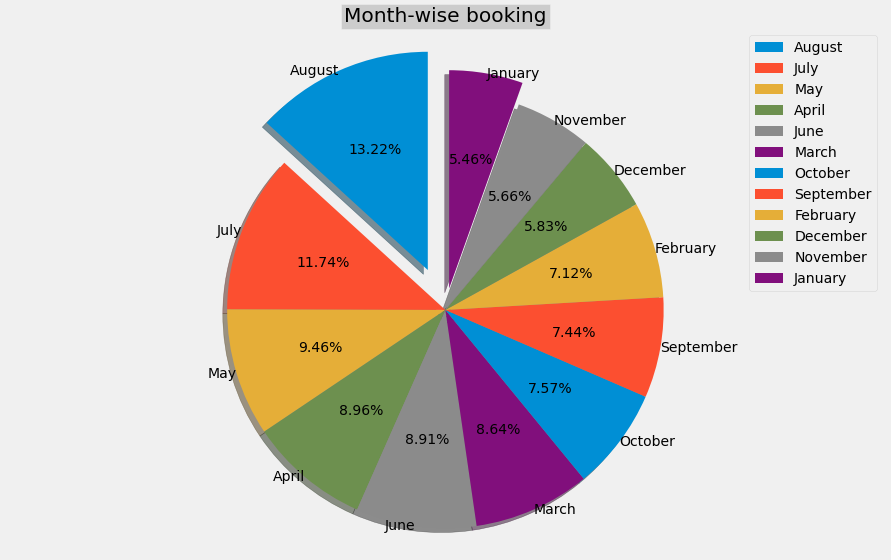

In [ ]:
exp2 = [0.2, 0,0,0,0,0,0,0,0,0,0,0.1]
plot_pie_chart_from_column(df, 'arrival_date_month', 'Month-wise booking', exp2)

##### 1. Why did you pick the specific chart?

**Pie chart is used to show the percentage share of booking in each month,on overall level.**

##### 2. What is/are the insight(s) found from the chart?

**The above percentage shows month May, July and Aug are the highest booking months due to holiday season. Recommending aggressive advertisement to lure more and more customers.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, with increased volume of visitors will help hotel to manage revenue in down time, will also help employee satisfaction and retention.**

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
guest_country_wise = pd.DataFrame(df[['country', 'total_heads']])
guest_country_wise_df = guest_country_wise.groupby(['country'])['total_heads'].sum()
guest_country_wise_df.sort_values(ascending = False, inplace = True)
top_10_country_by_guest = guest_country_wise_df.head(10)



PRT = Portugal
GBR = Great Britain & Northern Ireland
FRA = France
ESP = Spain
DEU = Germany
ITA = Italy
IRL = Ireland
BRA = Brazil
BEL = Belgium
NLD = Netherland


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


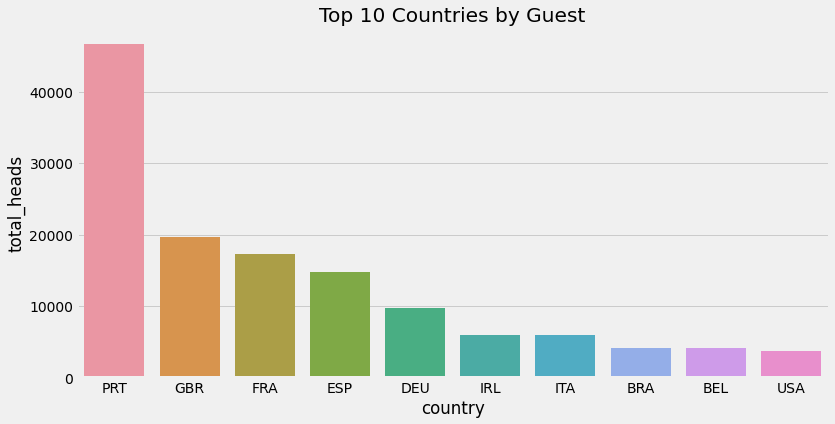

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(top_10_country_by_guest.index, top_10_country_by_guest).set(title='Top 10 Countries by Guest')
print("\n\nPRT = Portugal\nGBR = Great Britain & Northern Ireland\nFRA = France\nESP = Spain\nDEU = Germany\nITA = Italy\nIRL = Ireland\nBRA = Brazil\nBEL = Belgium\nNLD = Netherland")

##### 1. Why did you pick the specific chart?

**We have seen that mostly from which country Guests is coming**

***Chart is showing for top 10 country***

##### 2. What is/are the insight(s) found from the chart?

**As we can see, that maximum guest is coming from Portugal**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**We can do more advertising & can provide attractive offers to Portugal guests to enhance the customer volume**

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
hotel_bookings = df['hotel'].value_counts()
print(hotel_bookings)

City Hotel      47437
Resort Hotel    31632
Name: hotel, dtype: int64


In [ ]:
df_not_canceled = df[df['is_canceled']==0]  #hotel bookings which are not cancelled
final_booked = df_not_canceled['hotel'] #hotels booked without canceled i.e hotels which are actually booked
t_bookings = final_booked.value_counts() #total bookings in resort and city hotels
r_bookings = t_bookings[0] #total bookings in resort
c_bookings = t_bookings[1] #total bookings in city

Text(0.5, 1.0, 'Total Bookings')

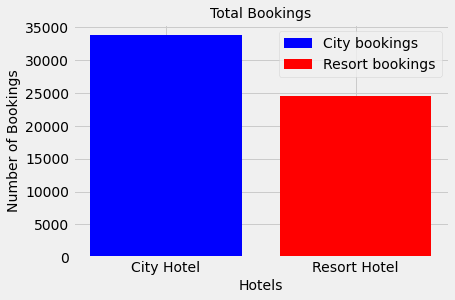

In [ ]:
plt.style.use('fivethirtyeight')
plt.bar(t_bookings.index[0],t_bookings[0],color=['blue'])
plt.bar(t_bookings.index[1],t_bookings[1],color=['red'])
plt.legend(["City bookings", "Resort bookings"])
axis_font = {'fontname':'Arial', 'size':'14'}
plt.xlabel('Hotels', **axis_font)
plt.ylabel('Number of Bookings', **axis_font)
plt.title('Total Bookings', **axis_font)

##### 1. Why did you pick the specific chart?

**A bar chart is a chart that presents categorical data, and here i want to show the data pertaining to categories of hotels**.

##### 2. What is/are the insight(s) found from the chart?

**The total bookings without cancellation in the city hotel is more than the resort hotel.**

**More than 60% of the population booked the City hotel**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes. As it is just a insight of hotel bookings and we only compared the bookings in diffirent hotel. so, there is no negative insights that lead to negative growth.**

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
percent_b_per_y = ((df['arrival_date_year'].value_counts())/len(df['arrival_date_year'])*100) #percentage of bookings per year
print(percent_b_per_y.sort_index())

2015    14.608759
2016    48.808003
2017    36.583237
Name: arrival_date_year, dtype: float64


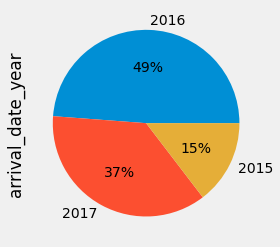

In [ ]:
plt.style.use('fivethirtyeight')
percent_b_per_y.plot(kind='pie',  autopct='%1.0f%%')

##### 1. Why did you pick the specific chart?

**A pie chart (or a circle chart) is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. And here we are showing the percentage proportion of each year.**

##### 2. What is/are the insight(s) found from the chart?

**More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 12% the following year**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes.**
**Yes, as the bookings were increased from the year 2015 to 2016, then there is rapid fall from 2016 to 2017.**

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]
names = ['Single', 'Couple', 'Family']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count] #calculating percentage of bookings

Text(0.5, 1.0, 'Booking Type')

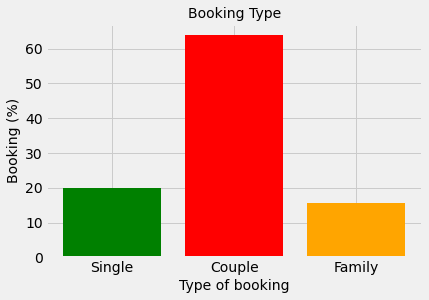

In [ ]:
plt.style.use('fivethirtyeight')
plt.bar(names,count_percent,color=['green', 'red', 'orange'])
axis_font = {'fontname':'Arial', 'size':'14'}
plt.xlabel('Type of booking', **axis_font)
plt.ylabel('Booking (%)', **axis_font)
plt.title('Booking Type', **axis_font)

##### 1. Why did you pick the specific chart?

**Here we are showing bookings type so they are all diffirent categories that is why we used the bar graph**

##### 2. What is/are the insight(s) found from the chart?

**The couple have the most bookings among the categories(single,couple,family).**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes.**
**Yes, the couple are booking the most but the family is not booking the hotels, so might be the hotel is not able to fulfill the requirements of family.**

#### Chart - 9

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


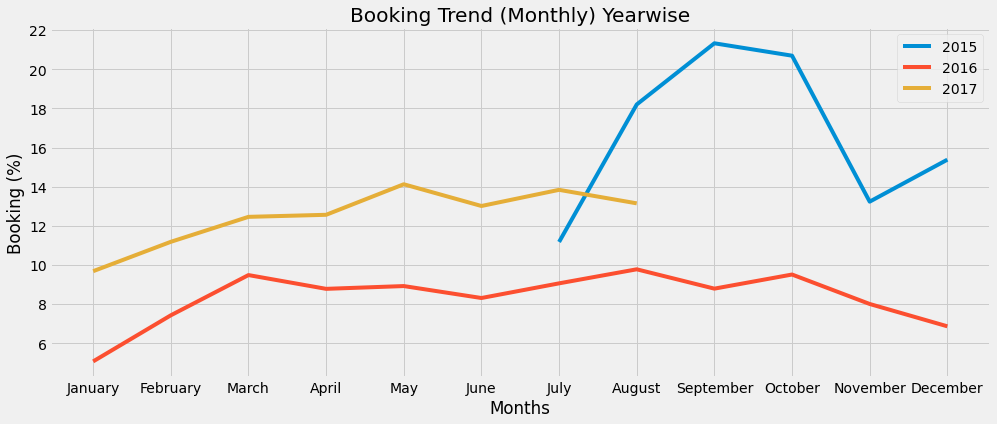

In [ ]:
# Chart - 9 visualization code
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

unique_years = df_not_canceled['arrival_date_year'].value_counts().sort_index()


sorted_months = df_not_canceled.loc[df_not_canceled['arrival_date_year']==unique_years.index[0],'arrival_date_month'].value_counts().reindex(new_order)


x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100 # %Bookings

sorted_months = df_not_canceled.loc[df_not_canceled['arrival_date_year']==unique_years.index[1],'arrival_date_month'].value_counts().reindex(new_order)


x1 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100 # %Bookings

sorted_months = df_not_canceled.loc[df_not_canceled['arrival_date_year']==unique_years.index[2],'arrival_date_month'].value_counts().reindex(new_order)


x1 = sorted_months.index
y3 = sorted_months/sorted_months.sum()*100 # %Bookings


fig, ax = plt.subplots(figsize=(15,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly) Yearwise')


sns.lineplot(x1, y1.values, label='2015', sort=False)
sns.lineplot(x1, y2.values, label='2016', sort=False)
sns.lineplot(x1, y3.values, label='2017', sort=False)

##### 1. Why did you pick the specific chart?

**A line chart with multiple groups allows to show the evolution of several items on the same figure**

##### 2. What is/are the insight(s) found from the chart?

**Average bookings in September is maximum and in January is minimum.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes.**
**Yes, as we can see the bookings from year 2016 to 2017 kept on decreasing.**

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
repeated_guest = df_not_canceled[df_not_canceled['is_repeated_guest']==1]
repeated_guest.reset_index(level=0, inplace=True)
repeated_guest.rename(columns={'index': 'no_of_guests'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


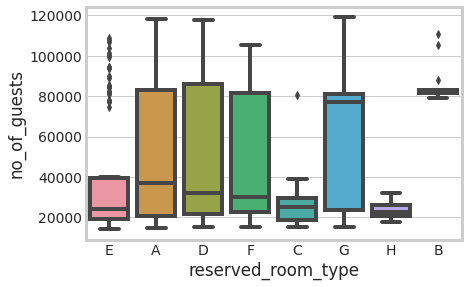

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x = 'reserved_room_type', y = 'no_of_guests', data = repeated_guest)

##### 1. Why did you pick the specific chart?

**A boxplot summarizes the distribution of a numeric variable for one or several groups. It allows to quickly get the median, quartiles and outliers.**

##### 2. What is/are the insight(s) found from the chart?

**The room G have maximum number of repeated guests i.e 119070 and room E have the least i.e 13937.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the room which is used most of times will require more attention as compared to other.**
**Yes, if we are giving equal amount of attention to all the rooms then it would be waste in the rooms which are not used more often.**

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
country_meal = df_not_canceled.loc[:,['country','meal']].value_counts().sort_values(ascending=False)
country_meal = pd.DataFrame(country_meal[:20])
country_meal.reset_index(level=0, inplace=True)
country_meal.reset_index(level=0, inplace=True)
country_meal.columns = ['meal','country','values']

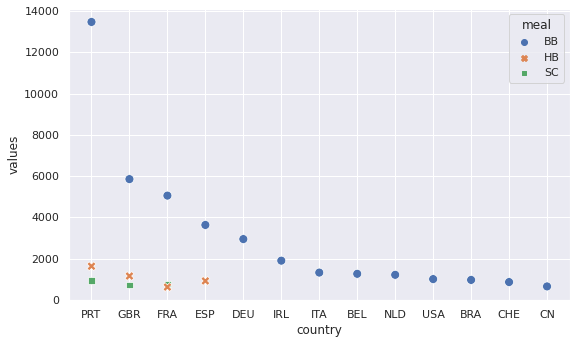

In [ ]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.scatterplot(data=country_meal, x="country", y="values", hue="meal",style = "meal",s=80)

##### 1. Why did you pick the specific chart?

**A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values of variables for a set of data.**

##### 2. What is/are the insight(s) found from the chart?

**From the above chart we know the type of meal mostly ordered by the top booking countries and we can conclude by looking at it that most countries want the BB type meal and the least ordered meal is SC type.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, as the ordered meal is BB for most of the countries, the hotels would be more focusing on that meal.**

**No, there are not any insights that lead to negative growth.**

#### Chart - 12

<ipython-input-51-6044cdf48022>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_canceled['total_nights'] = df_not_canceled['stays_in_week_nights']+df_not_canceled['stays_in_weekend_nights']


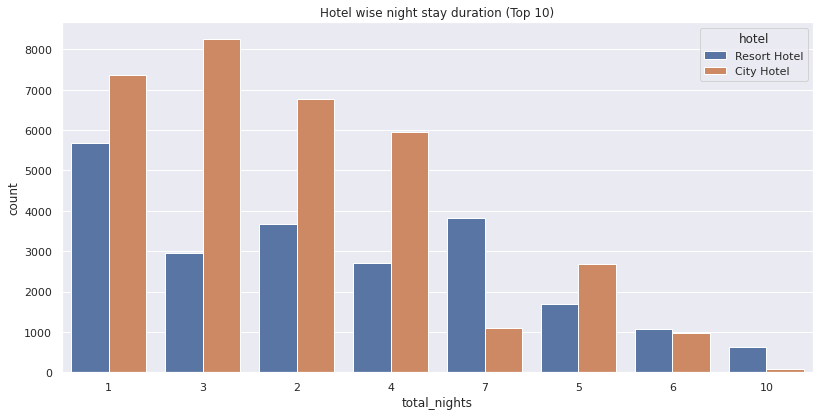

In [ ]:
# Chart - 12 visualization code

# stays_in_week_nights
# stays_in_weekend_nights
barWidth = 0.3
df_not_canceled['total_nights'] = df_not_canceled['stays_in_week_nights']+df_not_canceled['stays_in_weekend_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled['total_nights'].value_counts().loc[:10].index, ax=ax);

##### 1. Why did you pick the specific chart?

**A subplot is a secondary strand of the plot that is a supporting side story for any story or for the main plot. Subplots may connect to main plots, in either time and place or thematic significance**

##### 2. What is/are the insight(s) found from the chart?

**For Resort hotel, the most popular stay duration is three, two, one, and four days respectively. For City hotel, most popular stay duration is one, two, seven(week), and three respectively.**

#### Chart - 13

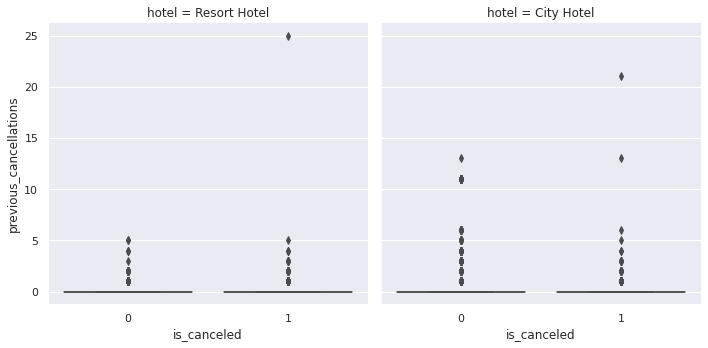

In [ ]:
# Chart - 13 visualization code
sns.catplot(x = "is_canceled", y = "previous_cancellations", data = df, kind = "box", col = "hotel")

##### 1. Why did you pick the specific chart?

**Catplot is used to show two categories side by side, using the same time scale,plotting sales from two different products. The goal is to show the two trends side by side.**

##### 2. What is/are the insight(s) found from the chart?

**The percentage of cancelation in city hotel is more than 28% and in resort hotel is 22%.**

#### Chart - 14

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


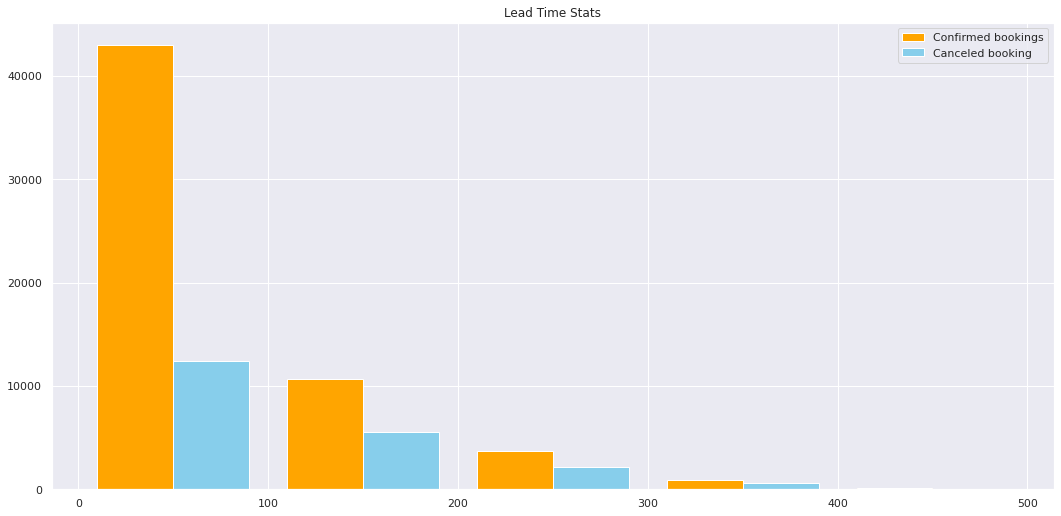

In [ ]:
# Pair Plot visualization code
df_canceled = df[df['is_canceled']!=0]
fig, plot = plt.subplots(figsize=(16,8))
plt.title("Lead Time Stats")
plt.hist([df_not_canceled.lead_time, df_canceled.lead_time], color = ["orange","skyblue"], bins= np.arange(0, 600,100));
plt.legend(["Confirmed bookings", "Canceled booking"]);

##### 1. Why did you pick the specific chart?

**A subplot is a secondary strand of the plot that is a supporting side story for any story or for the main plot. Subplots may connect to main plots, in either time and place or thematic significance.**

##### 2. What is/are the insight(s) found from the chart?


**It is clear that in the first 100 days of the lead time, we have the highest cancellation. Also the density of the cancellation decreases as the lead time increases still the cancelation rate increases as the lead time increases.**

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

1. For hotel business to flourish few things which we need to consider is high revenue generation, customers satisfaction and employeee retention.

2. We are able achieve the same by showing the client which are the months which are high in revenue generation by pie chart distribution

3. Increasing the revenue achieved by bar chart distribution of which typre room are most reserved and what are the months likely for visitors

4. So for these the client can be well prepare in advance so that minimum grievances would be faced by clients in long run and would help in further enhancement of their hospitality.

5. Outliers like higher the visitor then adr has reduced drastically was shown in scattered plot so in off season client can engage with offices for bulk booking this will aslo help extra revenue generation

6. We are able to show the trend of arrivals of visitor at client locations through which client engaged visitos well advance for there entaertainment and leisure activities

7. We where also able to co relate the values showing the max and min percentage between them so that the percenytage lying those numbers can be enhanced by various medium



# **Conclusion**

1. It is clear that in the first 100 days of the lead time, we have the highest cancellation. Also the density of the cancellation decreases as the lead time increases still the cancelation rate increases as the lead time increases
2. Cancellation in city hotel is more than resort hotel.
3. Duration of stay in city hotel is more than stay in resort hotel
4. Hotels should focus more on BB meals, as more customers prefer that.
5. On an average later half of the year has seen more bookings than the early  half.
6. Hotels should be more couple friendly as observerd couple bookings are more as compared to family and single booking.

**End of project**